In [2]:
%cd ~/repo/protein-transfer

/home/t-fli/repo/protein-transfer


In [3]:
%load_ext blackcellmagic

In [22]:
import pandas as pd
import numpy as np

In [5]:
import matplotlib.pyplot as plt

In [6]:
def df2plot(carp_name):
    df = pd.read_csv(f"pretrain_checkpoints/carp/cnn-{carp_name}-metrics.csv", header=None, names=["loss","accuracy", "tokens", "steps"])
    plt.plot(df.steps, df.loss, label = "loss")
    plt.plot(df.steps, df.accuracy, label = "accuracy")
    plt.plot(df.steps, df.tokens, label = "tokens")
    plt.legend()
    plt.show()

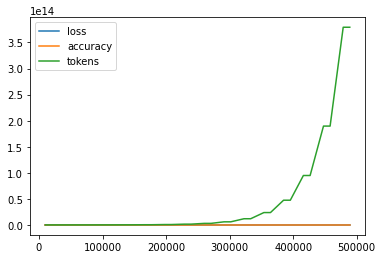

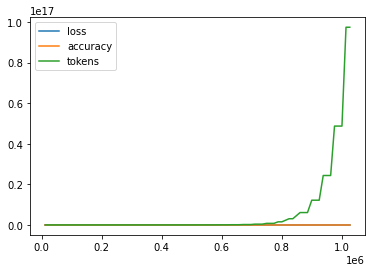

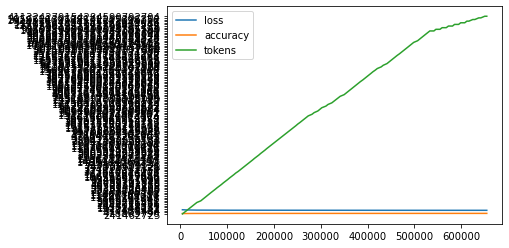

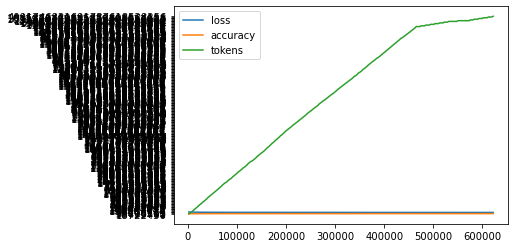

In [7]:

df2plot("600k")
df2plot("38M")
df2plot("76M")
df2plot("640M")

In [8]:
def df2logyplot(carp_name):
    df = pd.read_csv(f"pretrain_checkpoints/carp/cnn-{carp_name}-metrics.csv", header=None, names=["loss","accuracy", "tokens", "steps"])
    plt.semilogy(df.steps, df.loss, label = "loss")
    plt.semilogy(df.steps, df.accuracy, label = "accuracy")
    plt.semilogy(df.steps, df.tokens, label = "tokens")
    plt.legend()
    plt.show()

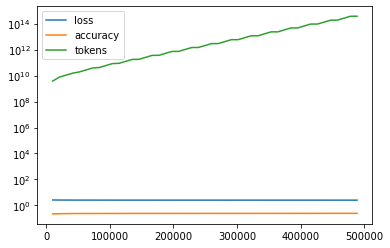

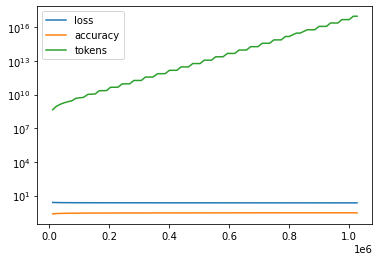

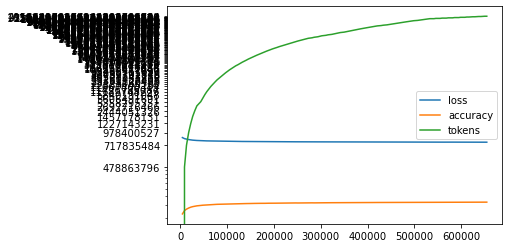

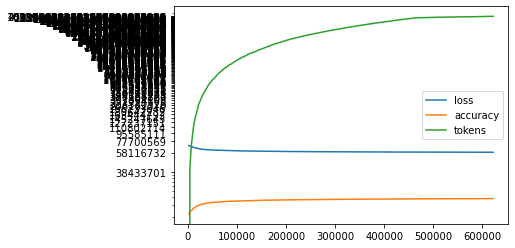

In [9]:
df2logyplot("600k")
df2logyplot("38M")
df2logyplot("76M")
df2logyplot("640M")

In [24]:
step_600k = pd.read_csv("pretrain_checkpoints/carp/cnn-600k-metrics.csv", header=None, names=["loss","accuracy", "tokens", "steps"])["steps"].to_numpy()
step_600k

array([ 10091,  20680,  41611,  52039,  72798,  83572, 104124, 114344,
       135254, 145904, 166518, 177086, 197618, 208054, 228828, 239263,
       260093, 270650, 291102, 301691, 322516, 333028, 353793, 364178,
       384774, 395395, 415934, 426529, 447570, 457988, 478594, 488942])

In [23]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

In [27]:
find_nearest(step_600k, step_600k[-1] / 2), find_nearest(
    step_600k, step_600k[-1] / 2 / 2
), find_nearest(step_600k, step_600k[-1] / 2 / 2 / 2)

(239263, 114344, 52039)

In [30]:
def df2steppt(carp_name):
    df_step = pd.read_csv(
        f"pretrain_checkpoints/carp/cnn-{carp_name}-metrics.csv",
        header=None,
        names=["loss", "accuracy", "tokens", "steps"],
    )["steps"].to_numpy()
    return (
        find_nearest(df_step, df_step[-1] / 2),
        find_nearest(df_step, df_step[-1] / 2 / 2),
        find_nearest(df_step, df_step[-1] / 2 / 2 / 2),
    )

In [34]:
from scr.params.emb import CARP_INFO

In [38]:
for carp_name in CARP_INFO.keys():
    carp_name = carp_name.split("carp_")[-1] 
    print(f"{carp_name}: {df2steppt(carp_name)}")

600k: (239263, 114344, 52039)
38M: (517622, 256897, 129575)
76M: (327960, 162959, 83180)
640M: (311757, 154698, 78810)


In [33]:
df2steppt("600k")
df2steppt("38M")
df2steppt("76M")
df2steppt("640M")

(311757, 154698, 78810)

In [12]:
pd.read_csv("pretrain_checkpoints/carp/cnn-38M-metrics.csv", header=None, names=["loss","accuracy", "tokens", "steps"])["steps"]

0       12359
1       24959
2       37534
3       51277
4       63820
       ...   
73     976494
74     989071
75    1001317
76    1014825
77    1027410
Name: steps, Length: 78, dtype: int64

In [ ]:
find_nearest(step_600k, step_600k[-1] / 2), find_nearest(
    step_600k, step_600k[-1] / 2 / 2
), find_nearest(step_600k, step_600k[-1] / 2 / 2 / 2)

In [21]:
1027410/2/2/2, 1027410/2/2, 1027410/2

(128426.25, 256852.5, 513705.0)

In [15]:
pd.read_csv("pretrain_checkpoints/carp/cnn-76M-metrics.csv", header=None, names=["loss","accuracy", "tokens", "steps"])["steps"]

0        4307
1        8730
2       12997
3       17646
4       22097
        ...  
133    629038
134    637344
135    641786
136    650106
137    654533
Name: steps, Length: 138, dtype: int64

In [16]:
pd.read_csv("pretrain_checkpoints/carp/cnn-640M-metrics.csv", header=None, names=["loss","accuracy", "tokens", "steps"])["steps"]

0        1954
1        3983
2        6021
3        8039
4        9913
        ...  
332    613947
333    615756
334    617748
335    619523
336    621983
Name: steps, Length: 337, dtype: int64

In [5]:
cnn38m = pd.read_csv("pretrain_checkpoints/carp/cnn-38M-metrics.csv", header=None, names=["loss","accuracy", "tokens", "steps"])

In [6]:
cnn38m.columns

Index(['loss', 'accuracy', 'tokens', 'steps'], dtype='object')

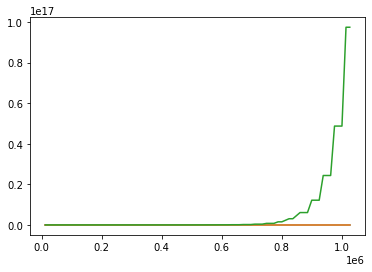

In [7]:
plt.plot(cnn38m.steps, cnn38m.loss, label = "loss")
plt.plot(cnn38m.steps, cnn38m.accuracy, label = "accuracy")
plt.plot(cnn38m.steps, cnn38m.tokens, label = "tokens")